## Why and How to 'Explode' a List-Like Column to Rows in Pandas

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('talk_data.csv')
df['recorded_at'] = df['recorded_at'].str.rstrip("T00:00:00.000+00:00")
df['year'] = df['recorded_at'].astype(str).str[0:4]
df=df[['talk_name','views','tags','year']]

In [3]:
df.head()

,talk_name,views,tags,year
0,Can you outsmart the apples and oranges fallacy?,119359,"['education', 'psychology', 'animation', 'TED-...",2021
1,The exploitation of US college athletes,438573,"['sports', 'law', 'education', 'United States'...",2020
2,How does ultrasound work?,140874,"['education', 'technology', 'animation', 'TED-...",2021
3,"An honest history of an ancient and ""nasty"" word",569477,"['sex', 'language', 'ancient world', 'history'...",2020
4,The electrical blueprints that orchestrate life,122682,"['biology', 'science', 'invention', 'robots', ...",2020


### Notice how the 'tags' column is different from the other columns

### The 'tags' column is just a string representation of a list (dtype:object), therefore we will need to first use python's ast.literal_eval() method to convert the 'tags' column from string to list.

In [4]:
from ast import literal_eval
df['tags']=df['tags'].apply(literal_eval)

### I used the pandas DataFrame.explode() method to explode list to rows
### I Used drop_duplicates() to remove any possible duplications after the explode procedure

In [5]:
df = df.explode('tags').drop_duplicates()

In [6]:
df.head(11)

,talk_name,views,tags,year
0,Can you outsmart the apples and oranges fallacy?,119359,education,2021
0,Can you outsmart the apples and oranges fallacy?,119359,psychology,2021
0,Can you outsmart the apples and oranges fallacy?,119359,animation,2021
0,Can you outsmart the apples and oranges fallacy?,119359,TED-Ed,2021
0,Can you outsmart the apples and oranges fallacy?,119359,brain,2021
0,Can you outsmart the apples and oranges fallacy?,119359,climate change,2021
1,The exploitation of US college athletes,438573,sports,2020
1,The exploitation of US college athletes,438573,law,2020
1,The exploitation of US college athletes,438573,education,2020
1,The exploitation of US college athletes,438573,United States,2020


#### Create a word cloud to visualize the most popular TED talks from 2006 to 2021 in the tag category of 'education' by using matplotlib 

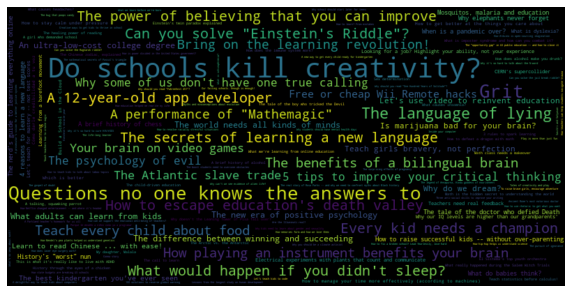

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df_wc = df[(df['tags']=='education')]
df_wc = df_wc[['talk_name','views']]
df_wc =df_wc.set_index('talk_name').to_dict()['views']

wc = WordCloud(width=800, height=400,max_words=200, ).generate_from_frequencies(df_wc)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()